In [240]:
%run D:/Projects/SignatureProject/signature.py
self = Signature_Generator(name=generate_random_string())
# self._levenshtein_similarity('u.sp
# lit("_")[0]','v.split("_")[0]weef')

In [283]:
    %run D:/Projects/SignatureProject/signature.py
    self = Signature_Generator(name=generate_random_string())
    # self.remove_all()
    # plt.imshow(self._render_signature("fvsfdvsdfbb"))
    self.create_multiple()

['kspUUvkDnIQ',
 'kspUUvkbnIE',
 'kspUUvKDnIY',
 'ksphUvkDDIQ',
 'kspUUmkDnIf',
 'kspUUvCEnIQ',
 'kspUUvkDnIQ',
 'ks2TUvbDnIV',
 'ksuUYvUXnIQ',
 'kspUUvA2fEQ',
 'kspDUvkDWll',
 'kspjUakyZIQ',
 'kspUUvkDnIQ',
 'kSQ9UvktYVQ',
 'kvjUtvkDh8L',
 'RJpPUv4DpIK',
 'ks0UUms8nNN',
 'jspfzvyDnEM',
 'kspUUvkDnIQ',
 'AsIHm20D2xQ',
 'kPOlhHkQYIy',
 '9vpvUG70nO2',
 'k5LrgeHDxI5',
 'kNtpMvYFoIt',
 'kspUUvkDnIQ',
 'r9JF5QuLM2d',
 'kkCdSprX84d',
 '2b1ZnF8Lsh1',
 'NgHFTWPgeDz',
 'V2AzbdZh69Q']

<Axes: ylabel='Frequency'>

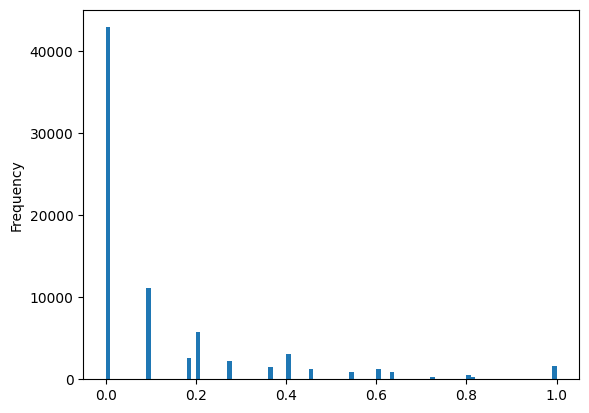

In [284]:
signatures=self.ground_truth_score()
signatures["y"]=(signatures["similarity"]>0.75)*1
d_Good=signatures[signatures["y"]==1]
d_Bad =signatures[signatures["y"]==0]
d_sample=pd.concat([d_Bad.sample(frac=3*d_Good.shape[0]/d_Bad.shape[0]),d_Good])
d_sample=d_sample.sample(frac=1)
d_sample.shape
signatures['similarity'].plot(kind='hist',bins=100)

In [285]:
from sklearn.model_selection import train_test_split
Train, Valid = train_test_split(d_sample, test_size=0.2, stratify=d_sample["y"], random_state=42)

In [288]:
%run D:/Projects/SignatureProject/signature.py

siamese=Signature_Siamese_Network()
siamese.fit(Train=Train[:50],Valid=Valid[:50])


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [290]:
self.return_images(Train[:50])[0]

AttributeError: 'Signature_Generator' object has no attribute 'return_images'

In [252]:
img2 = siamese.load_gray("Signatures/LYWEAbl53932jBL_2.png") / 255.0
img2.shape

(100, 400)

In [256]:
Train[:5]

,Signature_1,Signature_2,similarity,y
0,0hxEYx0PwDCHbEz_0.png,0hxEYx0PwDCHbEz_0.png,1.000000,1
1,0hxEYx0PwDCHbEz_0.png,0hxEYx0PwDCHbEz_1.png,1.000000,1
2,0hxEYx0PwDCHbEz_0.png,0hxEYx0PwDCHbEz_2.png,1.000000,1
3,0hxEYx0PwDCHbEz_0.png,0hxEYx0PwDCHbEz_3.png,1.000000,1
4,0hxEYx0PwDCHbEz_0.png,70uENIAg3FOeyEL_0.png,0.133333,0


In [267]:
    self=siamese
    def predict(self, data: pd.DataFrame,):
        img_A = np.stack([self.load_gray(self.signatures_folder+f) for f in data[self.Signature_1]],axis=0) / 255.0
        img_B = np.stack([self.load_gray(self.signatures_folder+f) for f in data[self.Signature_2]],axis=0) / 255.0
        y = data[self.y].values.reshape(-1, 1)
        pred = self.model.predict([img_A, img_B],  )
        return pred.ravel()
    predict(self, Train[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


array([4.9898830e-01, 9.9545527e-01, 9.9739534e-01, 9.9721700e-01,
       1.9903388e-07], dtype=float32)

In [268]:
img1 = siamese.load_gray("Signatures/D90pJoTG3B3xyEp_1.png") / 255.0
img2 = siamese.load_gray("Signatures/LYWEAbl53932jBL_2.png") / 255.0

# Ensure both images are resized or shaped as (100, 400, 1)
# img1 = np.expand_dims(img1, axis=-1)
# img2 = np.expand_dims(img2, axis=-1)

# Predict similarity
score = siamese.model.predict([[img1], [img2]])
print("Similarity score:", score[0][0])


encoder = siamese.model.layers[2]  # shared encoder model

embedding1 = encoder.predict(np.expand_dims(img1, axis=0))
embedding2 = encoder.predict(np.expand_dims(img2, axis=0))

# Use cosine or Euclidean distance
from numpy.linalg import norm
cos_sim = np.dot(embedding1, embedding2.T) / (norm(embedding1) * norm(embedding2))
print("Cosine similarity:", cos_sim[0][0])

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

embeddings = np.vstack([embedding1, embedding2])
pca = PCA(n_components=2)
xy = pca.fit_transform(embeddings)

plt.scatter(xy[:,0], xy[:,1], c=["red", "blue"])
plt.title("Signature Embeddings")
plt.show()

ValueError: Input 0 of layer "functional_87" is incompatible with the layer: expected shape=(None, 100, 400, 1), found shape=(32, 400)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

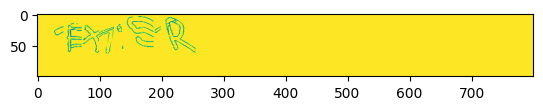

In [42]:
def _render_signature(self, text: str) -> np.ndarray:
    """Render a single word with jitter, shear, overlap, and pressure effects."""
    font_path    = random.choice(self.fonts)
    font_size    = self.font_size
    image_size   = self.image_size
    text_color   = 0               # black ink
    bg_color     = 255             # white background
    rotation_deg = 5

    img = Image.new("L", image_size, bg_color)
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(str(font_path), font_size)

    x_cursor = random.randint(int(font_size * 0.1), int(font_size * 0.5))

    # Create a baseline jitter sine wave
    wave_amplitude = font_size * 0.05
    wave_frequency = 2 * math.pi / max(1, len(text))

    for i, ch in enumerate(text):
        # Get character bounding box
        bbox   = font.getbbox(ch)
        char_w = bbox[2] - bbox[0]
        char_h = bbox[3] - bbox[1]

        # Simulated pen pressure: random stroke width
        stroke_width = random.randint(1, 3)

        # Character mask
        mask = Image.new("L", (char_w + 4, char_h + 4), bg_color)
        draw_mask = ImageDraw.Draw(mask)
        draw_mask.text((-bbox[0] + 2, -bbox[1] + 2), ch, font=font,
                       fill=text_color, stroke_width=stroke_width)

        # Shear (slant) transformation matrix
        shear_amount = random.uniform(-0.25, 0.25)
        matrix = (1, shear_amount, 0, 0, 1, 0)  # Affine shear in x-direction
        mask = mask.transform(
            (mask.width, mask.height), Image.AFFINE, matrix, fillcolor=bg_color
        )

        # Rotation
        mask = mask.rotate(
            random.randint(-rotation_deg, rotation_deg),
            resample=Image.BICUBIC,
            expand=True,
            fillcolor=bg_color
        )

        # Vertical position using sine wave jitter
        y_base = int(image_size[1] * 0.4 + wave_amplitude * math.sin(i * wave_frequency))

        # Paste with transparency
        img.paste(mask, (x_cursor, y_base - mask.size[1] // 2), mask)

        # Cursive linking: reduced spacing and overlap
        spacing = mask.size[0] - random.randint(int(font_size * 0.15), int(font_size * 0.4))
        x_cursor += max(5, spacing)
    plt.imshow(img)
    return np.array(img, dtype=np.uint8)
_render_signature(self, "text: str")

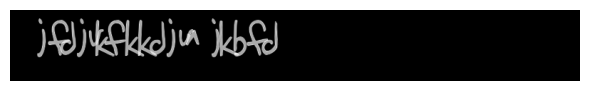

In [117]:
# ---- parameters that already exist in your class ----
text         = "jfdjvkfkkdjvnjkbfd"
font_path    = random.choice(self.fonts)
font_size    = self.font_size
image_size   = self.image_size          # e.g. (800, 100)
text_color   = 180                      # white ink on black background
bg_color     = 0                        # pure black background
rotation_deg = 5

# ---- canvas: single‑channel (“L”) image ----
img = Image.new("L", image_size, bg_color)
draw = ImageDraw.Draw(img)
font = ImageFont.truetype(str(font_path), font_size)

# heuristic starting point
x_cursor = random.randint(int(font_size * 0.1), int(font_size * 0.5))
y_base   = int(image_size[1] * 0.4)

for ch in text:
    bbox   = font.getbbox(ch)
    char_w = bbox[2] - bbox[0]
    char_h = bbox[3] - bbox[1]
    # mask: white glyph (ink) on black background
    mask = Image.new("L", (char_w, char_h), 0)
    ImageDraw.Draw(mask).text((-bbox[0], -bbox[1]), ch, font=font, fill=text_color)

    # rotate the glyph mask
    mask = mask.rotate(random.randint(-rotation_deg, rotation_deg), resample=Image.BICUBIC, expand=True)

    # paste onto canvas using 'mask' both as image and mask ⇒ transparent background
    img.paste(mask, (x_cursor, y_base - mask.size[1] // 2), mask)

    # advance cursor
    x_cursor +=  random.randint(int(font_size * 0.1), int(font_size * 0.4))

# numpy view if you still need it downstream
img_np = np.array(img, dtype=np.uint8)

plt.figure(figsize=(6, 2))
plt.imshow(img_np, cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.show()

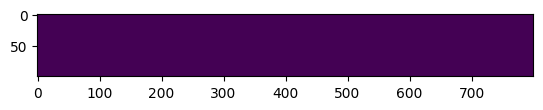

In [37]:
        text="jfdjvkfkkdjvnjkbfd"
        img = Image.new("L", self.image_size, 255)
        draw = ImageDraw.Draw(img)
        
        font_path = random.choice(self.fonts)
        font = ImageFont.truetype(str(font_path), self.font_size)

        # heuristic positioning
        x_cursor = random.randint(int(self.font_size * 0.1), int(self.font_size * 0.5))
        y_base = int(self.image_size[1] * 0.4)

        # draw each character separately, allowing random rotation
        for ch in text:
            rotated = Image.new("L", self.image_size, 255)
            ImageDraw.Draw(rotated).text((0, 0), ch, font=font, fill=self.text_color)
            rotated = rotated.rotate(random.randint(-5, 5), resample=Image.BICUBIC, expand=True )
            img.paste(rotated, (x_cursor, y_base), rotated)
            x_cursor += rotated.size[0] + random.randint(0, int(self.font_size * 0.15))
        # convert to grayscale
        img_np = np.array(img.convert("L"))
        # distort / noise
        # img_np = self._distort_high_values(img_np)
        # img_np = self._add_noise(img_np)
        plt.imshow(img_np)

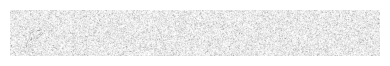

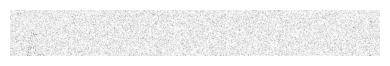

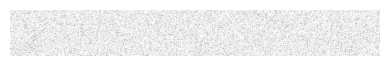

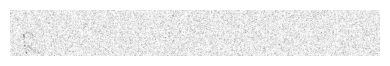

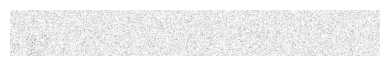

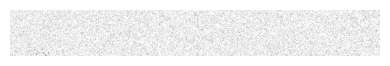

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 100, 80,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 100, 80,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ base_cnn            │ (None, 128)       │  6,857,600 │ input_layer_1[0]… │
│ (Functional)        │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 128)       │          0 │ base_cnn[0][0],   │
│                     │                   │            │ base_cnn[1][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ lambda[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,857,729 (26.16 MB)

 Trainable params: 6,857,729 (26.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3


ValueError: Input 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 100, 80, 1), found shape=(None, 100, 800)

In [14]:
# ═════════════════════════════════════════════════════════════════════════════
#  3.  Handy CLI driver  (optional)
# ═════════════════════════════════════════════════════════════════════════════
if __name__ == "__main__":
    # quick smoke-test
    gen = Signature_Generator()
    gen.remove_all()
    files = gen.create_multiple(n_samples=6, show=True)

    # build positive/negative pairs
    pos_pairs = [(a, b, 1) for i, a in enumerate(files) for b in files[i + 1 :]]
    neg_pairs = []
    # generate a few random counterfeit examples for negatives
    for fp in files[: len(files) // 2]:
        fake = gen._random_string(6)  # random name
        fake_path, _ = gen.create_signature(output_file=f"{fake}.png", show=False)
        neg_pairs.append((fp, fake_path, 0))

    pairs_df = pd.DataFrame(pos_pairs + neg_pairs, columns=["file_A", "file_B", "label"])
    net = Signature_Siamese_Network(network_name="base_cnn")
    hist = net.fit(pairs_df, epochs=3, batch_size=4)
    net.plot_history(hist)